In [174]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import pandas as pd
import cv2 as cv

In [175]:
import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Input, Flatten , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.callbacks import TensorBoard
import time
from datetime import datetime, timedelta


2.9.1


In [176]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [177]:
x_train.shape

(60000, 28, 28)

In [178]:
# degerleri 0-1 sikistirildi
x_train = x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [179]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [180]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [181]:
x_train.shape

(60000, 28, 28, 1)

In [182]:


batch_size = 128
num_classes = 10
epochs = 10

In [192]:
earlyStoping = EarlyStopping(monitor='loss', mode= 'min', verbose=1, patience= 5)

In [193]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()),
model.add(Dense(10 ,activation='softmax'))




In [194]:
log_dir = "/tmp/tensorboard/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [195]:
kerasboard = TensorBoard(log_dir=log_dir,
                        histogram_freq=1,
                        batch_size=batch_size,
                        write_grads=False)

In [196]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 5, 5, 64)         

In [197]:
model.compile(loss='categorical_crossentropy' , optimizer = 'adam',metrics=['accuracy']  )

In [198]:
model.fit(x_train, y_train ,callbacks=[kerasboard,earlyStoping], batch_size=128 ,epochs=20, validation_split=0.10)

Epoch 1/20
422/422 [==============================] - 18s 43ms/step - loss: 0.3392 - accuracy: 0.9002 - val_loss: 0.0856 - val_accuracy: 0.9758
Epoch 2/20
422/422 [==============================] - 18s 44ms/step - loss: 0.1001 - accuracy: 0.9693 - val_loss: 0.0585 - val_accuracy: 0.9845
Epoch 3/20
422/422 [==============================] - 18s 42ms/step - loss: 0.0763 - accuracy: 0.9763 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 4/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 5/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0404 - val_accuracy: 0.9888
Epoch 6/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0363 - val_accuracy: 0.9898
Epoch 7/20
422/422 [==============================] - 18s 44ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0393 - val_accuracy:

In [208]:
# cıktıyı anaconda propmt terminaline yazılması gereklidir.
print("tensorboard --logdir="+kerasboard.log_dir)

tensorboard --logdir=/tmp/tensorboard/20221226-135418


In [202]:
lossHis = pd.DataFrame(model.history.history)

In [203]:
print(lossHis)

        loss  accuracy  val_loss  val_accuracy
0   0.339209  0.900241  0.085561      0.975833
1   0.100092  0.969278  0.058470      0.984500
2   0.076340  0.976315  0.045837      0.987500
3   0.064268  0.979815  0.043929      0.987167
4   0.057120  0.982500  0.040394      0.988833
5   0.050320  0.984593  0.036286      0.989833
6   0.044718  0.985907  0.039273      0.989000
7   0.042661  0.986315  0.036874      0.990167
8   0.038013  0.987963  0.031827      0.991500
9   0.035549  0.988963  0.030769      0.991333
10  0.034207  0.989074  0.028008      0.991333
11  0.032282  0.989222  0.032514      0.990833
12  0.030349  0.990315  0.030872      0.990667
13  0.027871  0.990944  0.032364      0.990667
14  0.026815  0.991259  0.028145      0.991167
15  0.025094  0.991759  0.027710      0.992667
16  0.025560  0.991481  0.030860      0.992000
17  0.023049  0.992852  0.026879      0.992667
18  0.023066  0.992611  0.025140      0.993000
19  0.021729  0.992944  0.028333      0.992667


<AxesSubplot: >

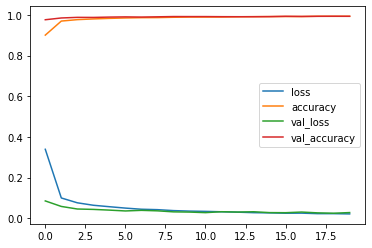

In [204]:
lossHis.plot()

In [205]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0247180238366127
Test accuracy: 0.9912999868392944


In [206]:
#real life example

def example():
    img = cv.imread('user_input.jpg',0)
    img = cv.bitwise_not(img)
    img =cv.resize(img, (28,28))
    plt.imshow(img , cmap='gray')
    plt.show()
    img = np.expand_dims(img, -1)
    img = np.expand_dims(img, 0)
    print(img.shape)
    pre =model.predict(img)
    pre = pd.DataFrame(pre)
    pre.iloc[0].plot(kind='bar')
    cv.waitKey(0)
    cv.destroyAllWindows()

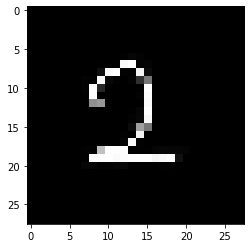

(1, 28, 28, 1)
1/1 [==============================] - 0s 58ms/step


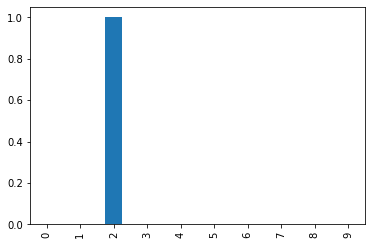

In [207]:
example()